In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
from scipy.stats import norm

In [3]:
df = pd.read_csv('AB_NYC_2019.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#change last_review to datetime object
df['last_review'] = pd.to_datetime(df['last_review'],format = '%Y-%m-%d')

# Exploring the Data

### Check for missing variables
* reviews_per_month & last_review is missing because number_of_reviews is 0.
* impute missing values for reviews_per_month with the value of 0.

In [6]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
#we can see that last_review and reviews_per_month are 0 when number_of_reviews is 0
df[df['last_review'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365
193,51438,1 Bedroom in 2 Bdrm Apt- Upper East,236421,Jessica,Manhattan,Upper East Side,40.77333,-73.95199,Private room,130,14,0,NaT,NaN,2,0
204,54466,Beautiful Uptown Manhattan apartmnt,253385,Douglas,Manhattan,Harlem,40.80234,-73.95603,Private room,200,30,0,NaT,NaN,1,365
260,63588,LL3,295128,Carol Gloria,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,NaT,NaN,7,349
265,63913,"HOSTING YOUR SUNNY, SPACIOUS NYC ROOM",312288,Paula,Manhattan,Inwood,40.86648,-73.92630,Private room,75,7,0,NaT,NaN,2,323
267,64015,Prime East Village 1 Bedroom,146944,David,Manhattan,East Village,40.72807,-73.98594,Entire home/apt,200,3,0,NaT,NaN,1,0


In [22]:
#impute missing values in reviews_per_month to be 0 where number_of_reviews is 0
df['reviews_per_month'] = np.where(df['number_of_reviews']==0, 0 ,df['reviews_per_month'])

In [23]:
#fill in null values for listing names to just " 
df['name'] = df['name'].fillna('')

In [24]:
#fill in host names as well
df['host_name'] = df['host_name'].fillna('')

### First lets see the distribution of air_bnb listings throughout New York City
* Manhattan has the most listings, Staten Island has the least

In [11]:
import seaborn as sns

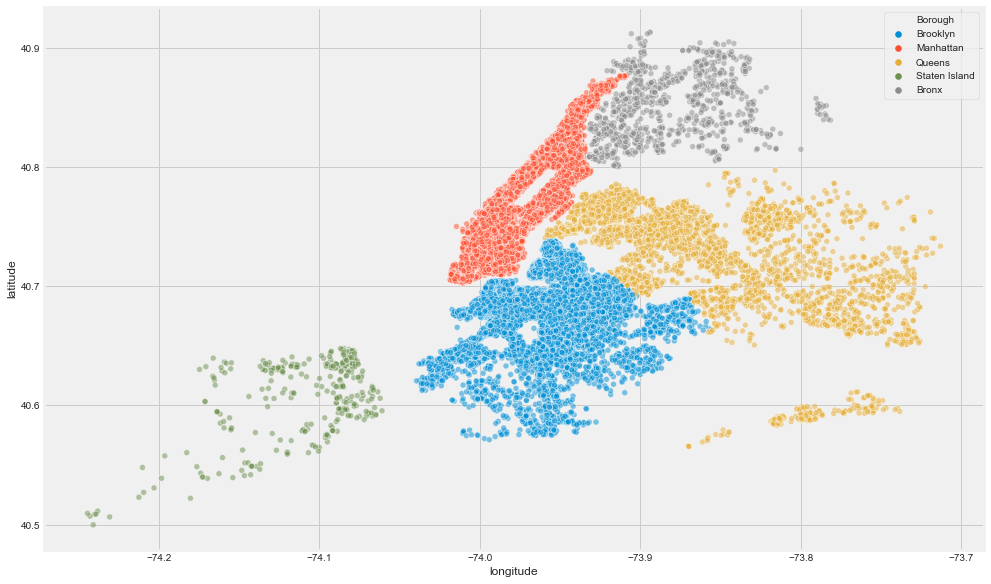

In [12]:
plt.figure(figsize = (15,10))
g = sns.scatterplot(x = df['longitude'], y = df['latitude'], hue = df['neighbourhood_group'],alpha = .5)
legend = g.legend()
legend.texts[0].set_text("Borough")

In [13]:
import folium
from folium.plugins import HeatMap

In [14]:
ny_lat = 40.7128
ny_long = -74.0060
m = folium.Map([ny_lat,ny_long], zoom_start = 11,tiles = "Stamen Toner")

In [15]:
HeatMap(df[['latitude','longitude']].dropna(),radius=7,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)
#m.save('airbnb_heatmap.html')

In [16]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

### Lets see the distribution of listing prices
* Majority of listings are under $175 per night 

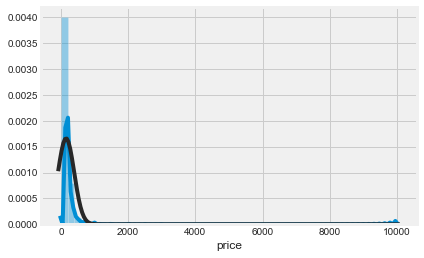

In [17]:
sns.distplot(df['price'],fit = norm);

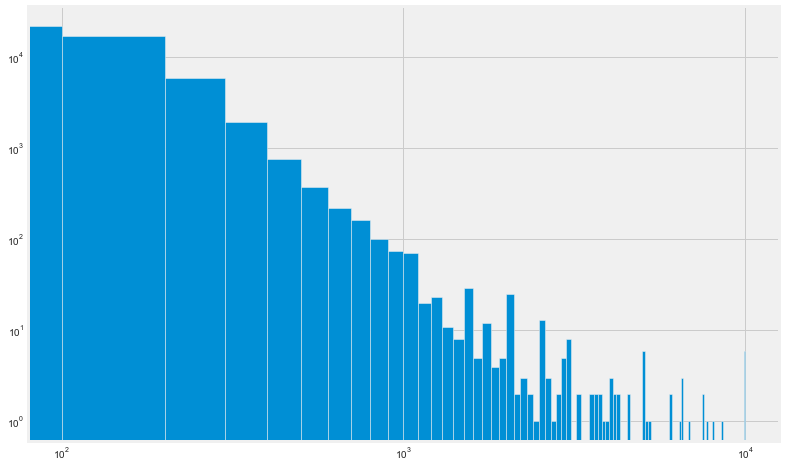

In [18]:
plt.figure(figsize=(12, 8))
plt.xscale('log')
plt.yscale('log')
df.price.hist(bins=100)

In [19]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

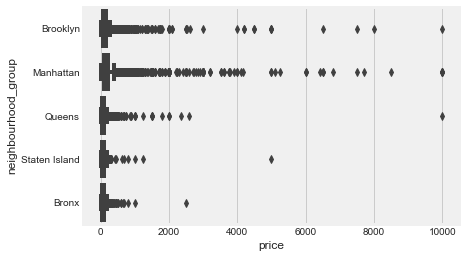

In [20]:
#price distribution by borough
sns.boxplot(x = df['price'] ,y = df['neighbourhood_group'])

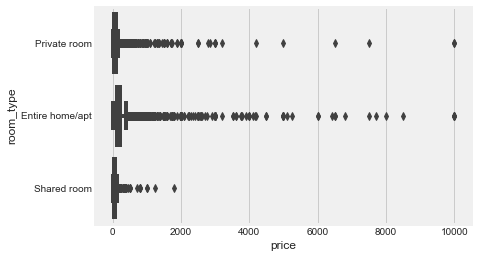

In [21]:
#price distribution by room type
sns.boxplot(x = df['price'], y=df['room_type']);

### Number of reviews per post
* Most listings have under 24 reviews

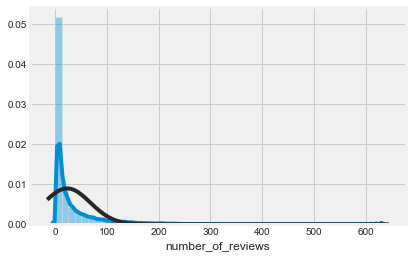

In [22]:
sns.distplot(df['number_of_reviews'],fit = norm)

In [23]:
df['number_of_reviews'].describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [24]:
df[df['number_of_reviews'] > 24]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,2019-06-23,1.50,1,39
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314


### Check minimum nights to stay
* Some listings require more than a year to stay, some of them look inactive


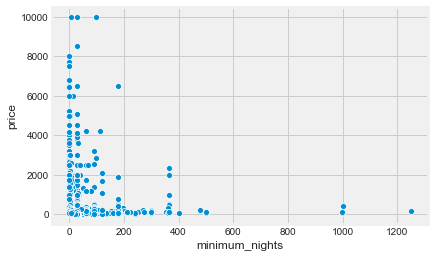

In [25]:
sns.scatterplot(x = df['minimum_nights'], y= df['price'])

In [26]:
df[df['minimum_nights'] > 365]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1305,568684,800sqft apartment with huge terrace,2798644,Alessandra,Brooklyn,Bushwick,40.70202,-73.92402,Entire home/apt,115,370,6,2018-04-15,0.09,1,365
2854,1615764,,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaT,0.00,1,362
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365
7355,5431845,Beautiful Fully Furnished 1 bed/bth,3680008,Aliya,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,2018-06-24,0.57,1,90
8014,6169897,Wonderful Large 1 bedroom,10720264,John,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,NaT,0.00,1,362
10829,8341919,Brand New Luxury Apt Lease Takeover,43945071,Shining,Queens,Long Island City,40.74654,-73.95778,Entire home/apt,199,480,0,NaT,0.00,1,365
11193,8668115,Zen Room in Crown Heights Brooklyn,8996336,Laura,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,2016-09-22,0.22,1,365
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.07,1,42
14285,11096888,Peaceful apartment close to F/G,2228137,Amanda,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,NaT,0.00,1,358
15946,12888849,"Bright Luxury Studio, Central Loc.",16476167,Sarah,Manhattan,Midtown,40.74513,-73.98475,Entire home/apt,250,366,0,NaT,0.00,1,365


### Check reviews

In [27]:
df['last_review'].dt.month.value_counts()

6.0     13589
7.0      5937
5.0      4701
1.0      2773
4.0      2109
12.0     1770
8.0      1667
10.0     1546
9.0      1535
3.0      1288
11.0     1158
2.0       770
Name: last_review, dtype: int64

In [28]:
df['last_review'].dt.year.value_counts()

2019.0    25209
2018.0     6050
2017.0     3205
2016.0     2707
2015.0     1393
2014.0      199
2013.0       48
2012.0       25
2011.0        7
Name: last_review, dtype: int64

### Check Calculated_host_listings_count

In [29]:
df['calculated_host_listings_count'].describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

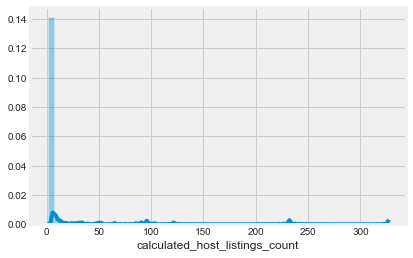

In [30]:
sns.distplot(df['calculated_host_listings_count'])

### Check Availability
* Surpisingly many places are not available, many hosts put listings but do not leave it available

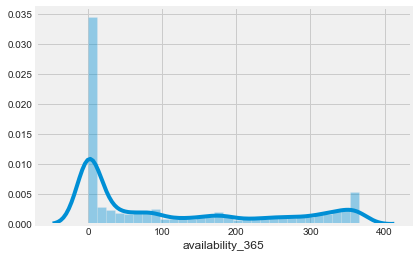

In [31]:
sns.distplot(df['availability_365'])

In [32]:
df[df['availability_365'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,0.00,1,0
48,13050,bright and stylish duplex,50846,Jennifer,Brooklyn,Bedford-Stuyvesant,40.68554,-73.94090,Entire home/apt,115,3,11,2017-01-01,0.10,1,0
66,16458,Light-filled 2B duplex in the heart of Park Sl...,64056,Sara,Brooklyn,Park Slope,40.67343,-73.98338,Entire home/apt,225,3,4,2017-09-24,0.16,1,0
88,20300,Great Location for NYC,76627,Pas,Manhattan,East Village,40.72912,-73.98057,Private room,50,1,2,2016-02-14,0.05,1,0
94,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0


# Feature Engineering
* Create new features from the categorical variables
* number_words_inposting = number of words in the names variables
* multiplehost = check to see if the posting has more than 1 host
* Create new column to reduce the amount of records in the neighbourhood column

### Name of posting
* Create a new column from the names of the posting
* Get the number of words in the posting

In [34]:
#turn name into a list separated by the spaces and find the length of the list/ number of words in a listing
df['number_words_inposting']= df['name'].str.split().str.len()

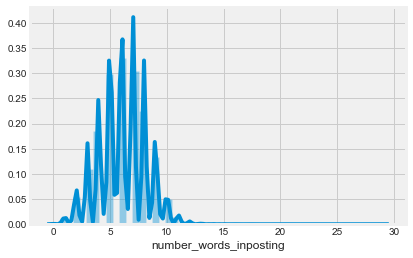

In [35]:
sns.distplot(df['number_words_inposting'])

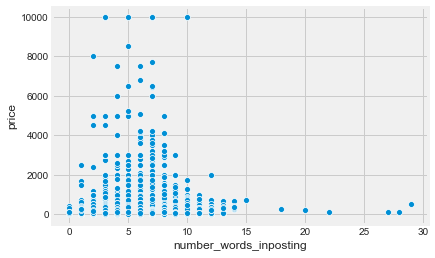

In [35]:
sns.scatterplot(y= df['price'], x = df['number_words_inposting'])

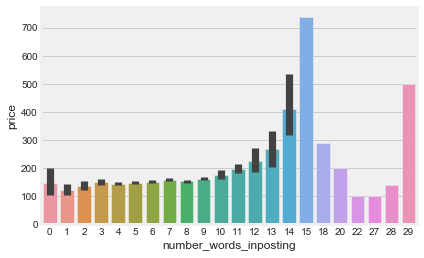

In [36]:
sns.barplot(y =df['price'], x=df['number_words_inposting'])

### Type of host
* Host names are not all accurate
* Hosts can be people or companies
* Split host_name to 1 host or multiple

In [36]:
#split host names to check if a listing has multiple hosts
hostnames_df = df['host_name'].str.split(expand = True)

In [38]:
#the first five listings has only one host
hostnames_df.head()

,0,1,2,3,4,5
0,John,None,None,None,None,None
1,Jennifer,None,None,None,None,None
2,Elisabeth,None,None,None,None,None
3,LisaRoxanne,None,None,None,None,None
4,Laura,None,None,None,None,None


In [39]:
#these rows have multiple hosts or is not owned by 1 individual
hostnames_df[~hostnames_df[2].isnull()].head()

,0,1,2,3,4,5
15,Allen,&,Irina,None,None,None
18,Adam,And,Charity,None,None,None
26,Claude,&,Sophie,None,None,None
30,Ssameer,Or,Trip,None,None,None
33,Ssameer,Or,Trip,None,None,None


In [37]:
#some host names are hotels, some are not the names of hosts
hostnames_df[~hostnames_df[3].isnull()].drop_duplicates().head()

,0,1,2,3,4,5
321,The,Box,House,Hotel,None,None
433,"Dee,",Dre,&,Mama,Shelley,None
553,Welcome,To,My,Place,None,None
1165,Elizabeth,(And,Jeff,Too),None,None
1381,"Christopher,",Samantha,And,Mason,None,None


In [38]:
#create a new column where we can see if a listing has multiple hosts
#we will count multiple hosts as those who have greater than 1 word in the host names.
df['multiplehost'] = ~hostnames_df[2].isnull()

In [39]:
df['multiplehost'].value_counts(normalize = True)

False    0.959444
True     0.040556
Name: multiplehost, dtype: float64

In [40]:
df['multiplehost'] = df['multiplehost'].astype(int)

### Creating a new categorical column
* Import cleaned csv of the nyc boundary
* Map the columns in csv to the df

In [41]:
#skip the first columns, and remove the last record
boundary = pd.read_csv('nyc_community_boundary.csv').iloc[:-1,1:]

In [42]:
boundary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
Comm_Boundary      59 non-null object
area_Kmsq          59 non-null float64
Pop_2010_Census    59 non-null object
Pop/Kmsq           59 non-null object
Neighborhoods      59 non-null object
dtypes: float64(1), object(4)
memory usage: 2.4+ KB


In [43]:
#replace \xa0 with ' '
boundary['Comm_Boundary'] = boundary['Comm_Boundary'].str.replace(u'\xa0', u' ')

In [44]:
#remove CB from each record of comm boundary
boundary['Comm_Boundary'] = boundary['Comm_Boundary'].str.replace('CB','')

In [45]:
#strip original df with '' on both sides of the string
boundary['Neighborhoods'] = boundary['Neighborhoods'].str.strip("''")

In [46]:
#split the string with, to create a list
boundary['Neighborhoods'] = boundary['Neighborhoods'].str.split(", ")

In [47]:
#turn the list into a dictionary
boundary_dictionary = dict(zip(boundary['Comm_Boundary'],boundary['Neighborhoods']))

In [48]:
#create new dictionary to map neighborhoods to the community_boundary
#reverse the dictionary
new_dic = {}
for k,v in boundary_dictionary.items():
    for x in v:
        #only get the first community, so that there are not overlapping neighborhood communities
        if x not in new_dic:
            new_dic.setdefault(x,[]).append(k)
            

In [49]:
#not all neighborhoods have a corresponding community district
#this is due to wrong information from the scraped website
new_dic.setdefault('Prospect-Lefferts Gardens','Brooklyn 9')

'Brooklyn 9'

In [50]:
df['community_boundary'] = df['neighbourhood'].map(new_dic)

Some community boundaries have null values, fill in as the value for neighbourhood for now  
Some community boundaries include 2 for each neighborhood, leave in for now

In [51]:
df['community_boundary'] = df['community_boundary'].fillna(df['neighbourhood'])

In [52]:
#no more null values for community_boundary
df[df['community_boundary'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_words_inposting,multiplehost,community_boundary


In [53]:
#remove the [] from some of the records in the columns
df['community_boundary'] = df['community_boundary'].map(lambda x: x[0] if isinstance(x,list) else x)

In [54]:
df['community_boundary'].head()

0     Brooklyn  12
1     Manhattan  5
2    Manhattan  10
3      Brooklyn  2
4    Manhattan  11
Name: community_boundary, dtype: object

In [55]:
#remove double spaces and replace with single space
df['community_boundary'] = df['community_boundary'].str.replace('  ',' ')

## Adding in mean income for each community
* Import a csv file that has information scraped from the website
* It has the community district and its respective mean income of 2013

In [56]:
income = pd.read_csv("mean_income2013.csv")

In [57]:
income['Community_District'].head()

0    Manhattan 1
1    Manhattan 2
2    Manhattan 3
3    Manhattan 4
4    Manhattan 5
Name: Community_District, dtype: object

In [58]:
nyc_airbnb = pd.merge(left=df,right=income,how ='outer',left_on='community_boundary', right_on='Community_District')

In [59]:
nyc_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_words_inposting,multiplehost,community_boundary,Community_District,Mean_Income
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,9,2018-10-19,0.21,6,365,8,0,Brooklyn 12,Brooklyn 12,39574.0
1,63546,Large and Cozy Private Bedroom,308652,Antonín,Brooklyn,Kensington,40.64106,-73.97426,Private room,39,...,45,2019-05-16,0.46,2,365,5,0,Brooklyn 12,Brooklyn 12,39574.0
2,125594,SUPER BIG AND COZY PRIVATE BEDROOM,308652,Antonín,Brooklyn,Kensington,40.64302,-73.97255,Private room,39,...,82,2019-05-19,0.94,2,365,6,0,Brooklyn 12,Brooklyn 12,39574.0
3,267652,Private clean pleasant spacious room.,164675,Janice,Brooklyn,Kensington,40.64277,-73.97296,Private room,60,...,20,2019-01-21,0.42,1,347,5,0,Brooklyn 12,Brooklyn 12,39574.0
4,282341,Kensington/Ditmas Park pied-a-terre,1471384,Dan,Brooklyn,Kensington,40.64330,-73.97386,Entire home/apt,90,...,3,2017-07-30,0.05,1,286,3,0,Brooklyn 12,Brooklyn 12,39574.0


In [60]:
nyc_airbnb['Mean_Income'].fillna(value = nyc_airbnb['Mean_Income'].mean(),inplace = True)

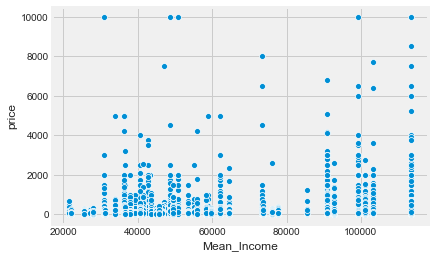

In [61]:
sns.scatterplot(x=nyc_airbnb['Mean_Income'], y=nyc_airbnb['price'])

In [62]:
from scipy.stats import linregress
linregress(nyc_airbnb['Mean_Income'],nyc_airbnb['price'])

LinregressResult(slope=0.0017214622515477093, intercept=45.66306884111739, rvalue=0.19416694610282462, pvalue=0.0, stderr=3.933271476882477e-05)

# Correlation of Variables
* Check the correlation of all numerical variables

In [63]:
numerical = ['price','minimum_nights','number_of_reviews','multiplehost',\
             'number_words_inposting','reviews_per_month','calculated_host_listings_count','availability_365','Mean_Income']

C:\Users\jshyo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jshyo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


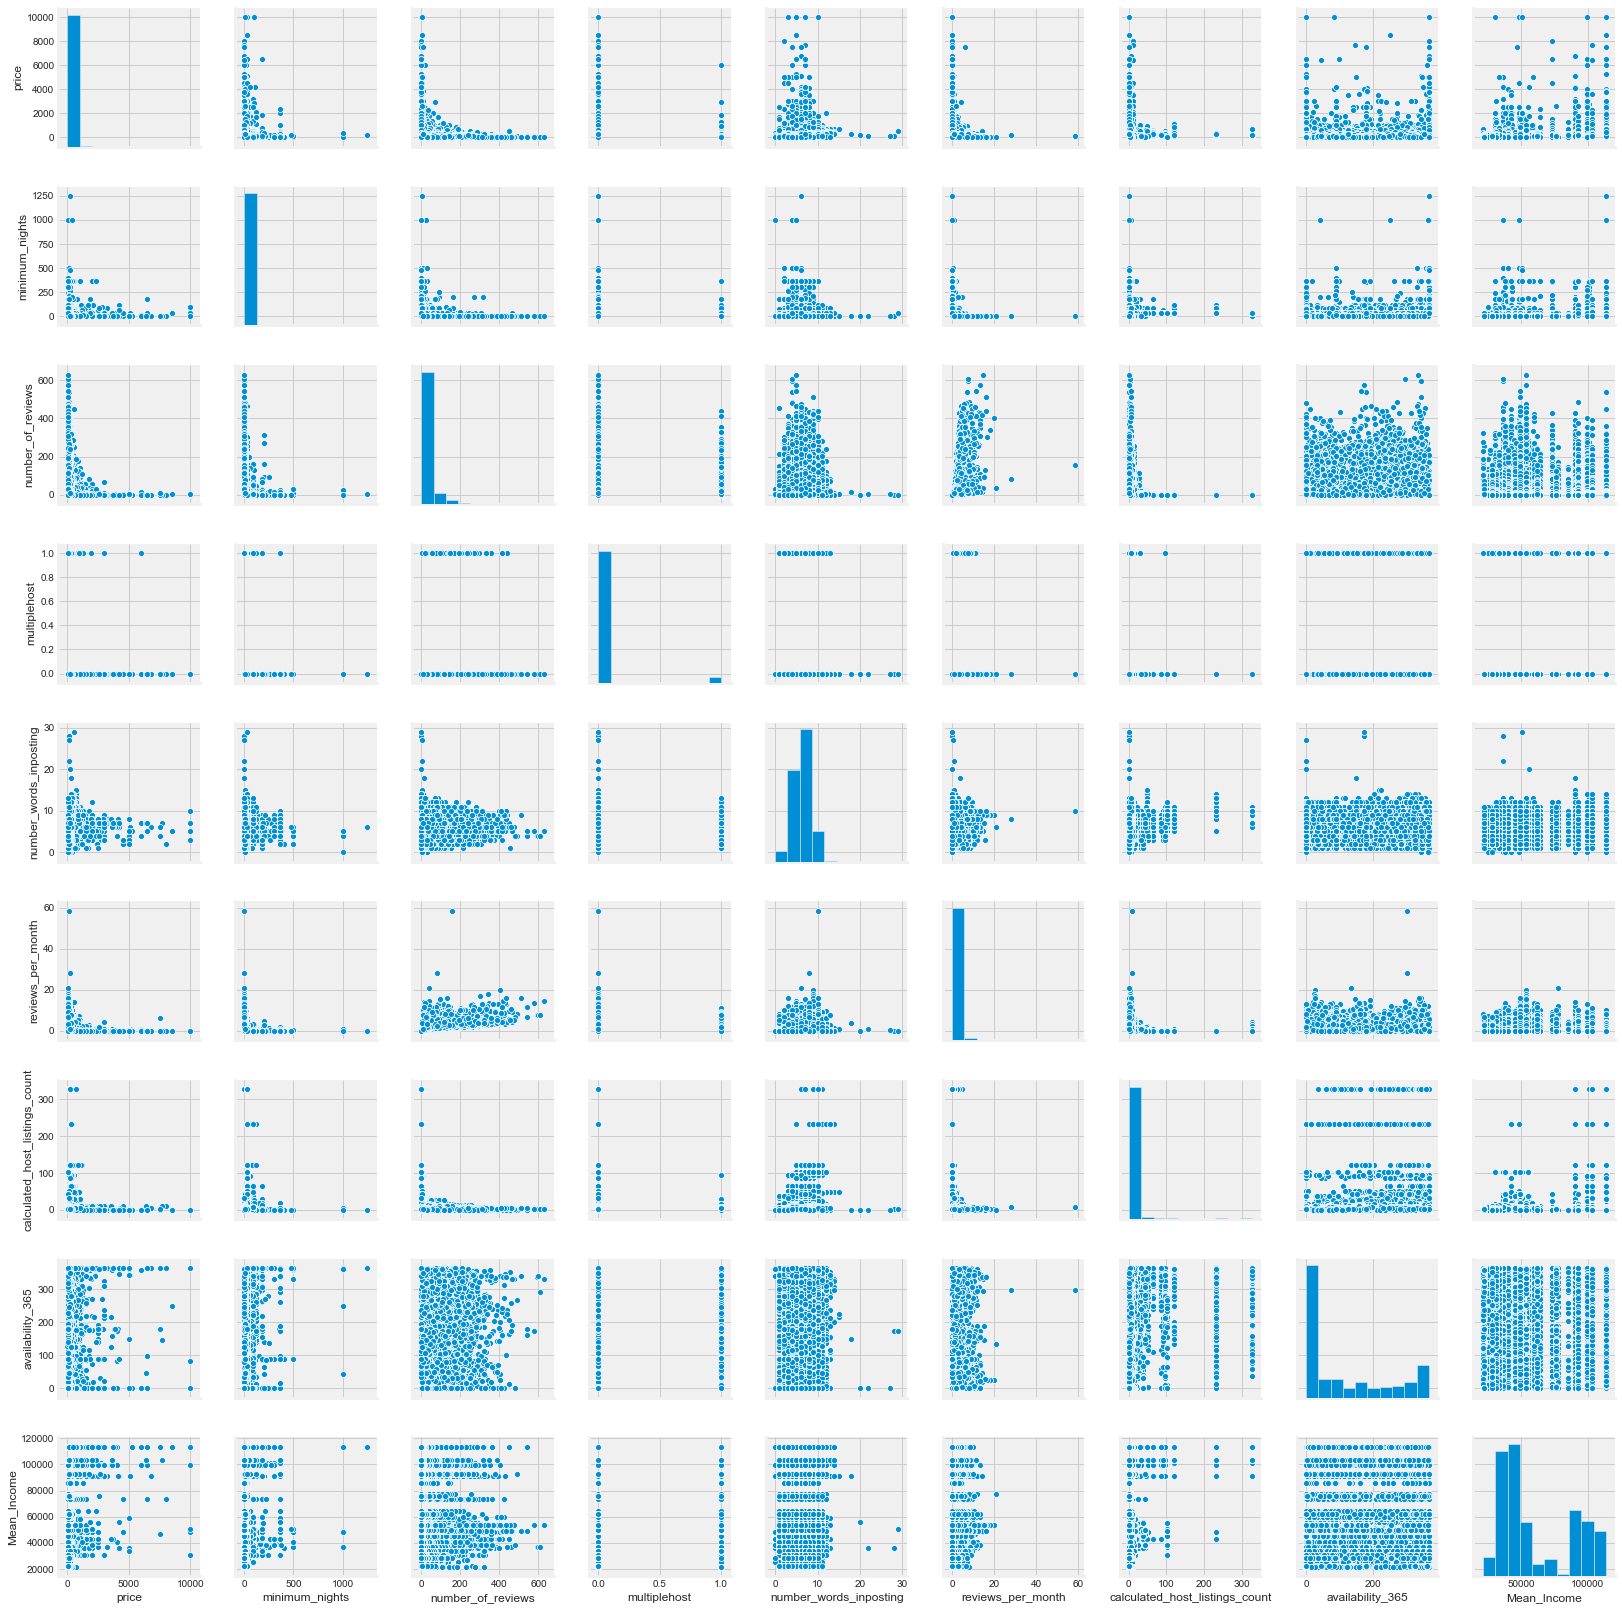

In [66]:
### Check correlation between numerical variables
sns.pairplot(nyc_airbnb[numerical])

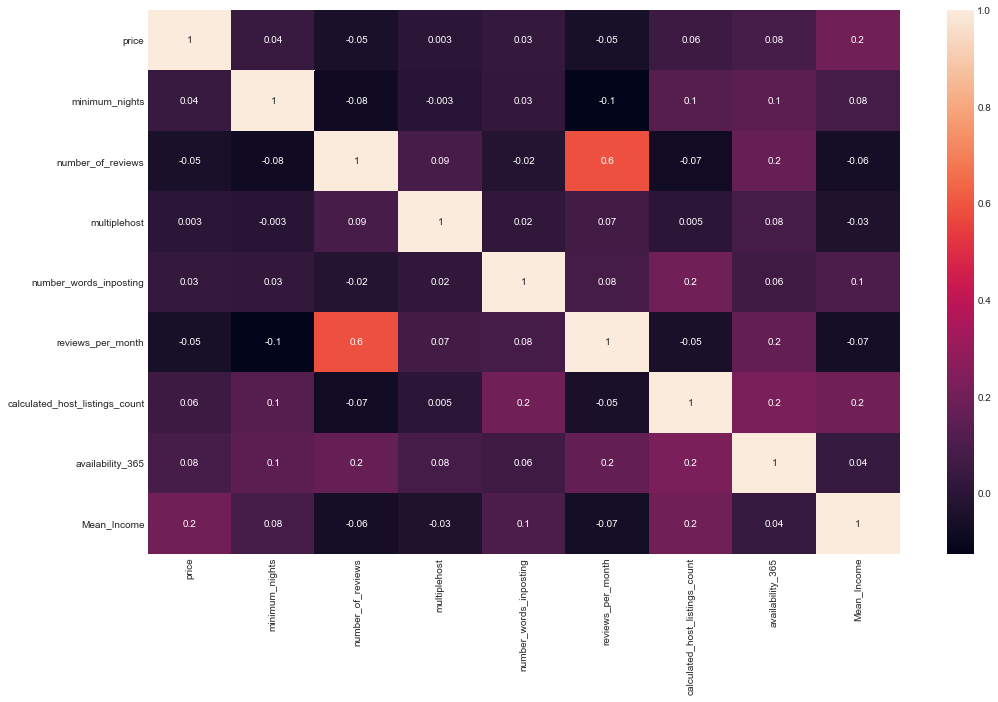

In [67]:
plt.figure(figsize=(15, 10))
sns.heatmap(nyc_airbnb[numerical].corr(), annot=True,fmt = '.1g')

# Model Preparation
* Use Dummy Encoding for the variables

In [64]:
#drop community_district as its the same as community_boundary
nyc_airbnb= nyc_airbnb.drop('Community_District',axis = 1).copy()

In [65]:
to_dummies = ['neighbourhood_group','room_type']

In [167]:
dataset = pd.get_dummies(nyc_airbnb, columns = to_dummies)

In [168]:
dataset

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,community_boundary,Mean_Income,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,...,Brooklyn 12,39574.000000,0,1,0,0,0,0,1,0
1,63546,Large and Cozy Private Bedroom,308652,Antonín,Kensington,40.64106,-73.97426,39,1,45,...,Brooklyn 12,39574.000000,0,1,0,0,0,0,1,0
2,125594,SUPER BIG AND COZY PRIVATE BEDROOM,308652,Antonín,Kensington,40.64302,-73.97255,39,1,82,...,Brooklyn 12,39574.000000,0,1,0,0,0,0,1,0
3,267652,Private clean pleasant spacious room.,164675,Janice,Kensington,40.64277,-73.97296,60,2,20,...,Brooklyn 12,39574.000000,0,1,0,0,0,0,1,0
4,282341,Kensington/Ditmas Park pied-a-terre,1471384,Dan,Kensington,40.64330,-73.97386,90,30,3,...,Brooklyn 12,39574.000000,0,1,0,0,0,1,0,0
5,317905,Come and go as you please in BKLN!,1631733,Jane,Kensington,40.64354,-73.97777,89,3,62,...,Brooklyn 12,39574.000000,0,1,0,0,0,1,0,0
6,452068,"Spacious 4 bedroom house, New York",2246071,Tamara,Kensington,40.64205,-73.97173,200,1,3,...,Brooklyn 12,39574.000000,0,1,0,0,0,1,0,0
7,516791,Lovely Brooklyn Apt,696306,Bethany,Kensington,40.64625,-73.97932,90,10,33,...,Brooklyn 12,39574.000000,0,1,0,0,0,1,0,0
8,656281,"QUIET, SPACIOUS, COMFORTABLE, & GREAT LOCATION",3180741,Manon,Kensington,40.64573,-73.98013,72,1,48,...,Brooklyn 12,39574.000000,0,1,0,0,0,0,1,0
9,710015,"Large room, Outdoor Patio, Great Host, Safe Area!",3136147,Gym Hoodie,Borough Park,40.63324,-73.99461,103,3,0,...,Brooklyn 12,39574.000000,0,1,0,0,0,0,1,0


In [169]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dataset['community_boundary'] = label.fit_transform(dataset['community_boundary'])

In [170]:
dataset.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,community_boundary,Mean_Income,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,...,16,39574.0,0,1,0,0,0,0,1,0
1,63546,Large and Cozy Private Bedroom,308652,Antonín,Kensington,40.64106,-73.97426,39,1,45,...,16,39574.0,0,1,0,0,0,0,1,0
2,125594,SUPER BIG AND COZY PRIVATE BEDROOM,308652,Antonín,Kensington,40.64302,-73.97255,39,1,82,...,16,39574.0,0,1,0,0,0,0,1,0
3,267652,Private clean pleasant spacious room.,164675,Janice,Kensington,40.64277,-73.97296,60,2,20,...,16,39574.0,0,1,0,0,0,0,1,0
4,282341,Kensington/Ditmas Park pied-a-terre,1471384,Dan,Kensington,40.64330,-73.97386,90,30,3,...,16,39574.0,0,1,0,0,0,1,0,0


In [171]:
numerical

['minimum_nights',
 'number_of_reviews',
 'multiplehost',
 'number_words_inposting',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [150]:
#remove price from the numerical list
numerical.remove('price')

ValueError: list.remove(x): x not in list

In [172]:
#normalize all numerical variables: numerical variables are defined above
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
dataset[numerical] = SC.fit_transform(dataset[numerical])

C:\Users\jshyo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jshyo\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [173]:
dataset.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,community_boundary,Mean_Income,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,-0.293996,-0.320414,...,16,39574.0,0,1,0,0,0,0,1,0
1,63546,Large and Cozy Private Bedroom,308652,Antonín,Kensington,40.64106,-73.97426,39,-0.293996,0.487665,...,16,39574.0,0,1,0,0,0,0,1,0
2,125594,SUPER BIG AND COZY PRIVATE BEDROOM,308652,Antonín,Kensington,40.64302,-73.97255,39,-0.293996,1.318190,...,16,39574.0,0,1,0,0,0,0,1,0
3,267652,Private clean pleasant spacious room.,164675,Janice,Kensington,40.64277,-73.97296,60,-0.245240,-0.073501,...,16,39574.0,0,1,0,0,0,0,1,0
4,282341,Kensington/Ditmas Park pied-a-terre,1471384,Dan,Kensington,40.64330,-73.97386,90,1.119925,-0.455093,...,16,39574.0,0,1,0,0,0,1,0,0


In [174]:
dataset.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_words_inposting', 'multiplehost',
       'community_boundary', 'Mean_Income', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [175]:
unnecessary_columns = ['price','name','id','host_id','host_name','latitude','longitude','last_review','neighbourhood']
X= dataset.drop(unnecessary_columns,axis= 1)
y= dataset.price

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 11)

In [177]:
from sklearn import metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [178]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [179]:
#training
print_evaluate(y_train, lin_reg.predict(X_train))

MAE: 73.30642623606367
MSE: 53159.89029714593
RMSE: 230.56428669060162
R2 Square 0.09799054396931428


In [180]:
#test
print_evaluate(y_test, lin_reg.predict(X_test))

MAE: 73.23899560923167
MSE: 48916.53808998998
RMSE: 221.1708346278731
R2 Square 0.10618680431046368


In [181]:
from sklearn.tree import DecisionTreeRegressor
DTree = DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.0001,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [182]:
#training
print_evaluate(y_train, DTree.predict(X_train))

MAE: 48.400908260860014
MSE: 33228.34995955976
RMSE: 182.28645029063395
R2 Square 0.43618608495456357


In [183]:
#test
print_evaluate(y_test,DTree.predict(X_test))

MAE: 77.78397221127096
MSE: 56179.66603673568
RMSE: 237.02250111906187
R2 Square -0.026526585767139066


In [184]:
pd.DataFrame({'Actual':np.array(y_test).flatten(), 'Predicted':lin_reg.predict(X_test)}).head()

,Actual,Predicted
0,40,53.937021
1,250,177.754602
2,80,142.852369
3,80,208.731367
4,37,62.108510


In [185]:
dict(zip(lin_reg.coef_,X_train.columns))

{-1.0202563457461868: 'minimum_nights',
 -10.619803204526391: 'number_of_reviews',
 -5.609378109952735: 'reviews_per_month',
 -6.134133043549652: 'calculated_host_listings_count',
 26.120329482715665: 'availability_365',
 1.8891438090221584: 'number_words_inposting',
 0.392755026967919: 'multiplehost',
 -0.3487176876002451: 'community_boundary',
 0.0008953132813049493: 'Mean_Income',
 -27.532598065203047: 'neighbourhood_group_Bronx',
 2.9547305523783542: 'neighbourhood_group_Brooklyn',
 40.92812669307462: 'neighbourhood_group_Manhattan',
 -6.874314186562027: 'neighbourhood_group_Queens',
 -9.475944993687868: 'neighbourhood_group_Staten Island',
 81.28612112302908: 'room_type_Entire home/apt',
 -23.81876172138142: 'room_type_Private room',
 -57.46735940164774: 'room_type_Shared room'}

In [136]:
# nyc_airbnb.to_csv('nyc_airbnb_cleaned.csv',index= False)